<a href="https://colab.research.google.com/github/Marah-Alasi/ParkinsonsDetection/blob/main/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veri seti
UCI Machine Learning Repository

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd

dataset = "/content/drive/MyDrive/PD/pd_speech_features.csv"
data = pd.read_csv(dataset)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [3]:
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


# Veri dengesizliği

Veri kümesinde sınıfların örnek sayısı dengeli olmadığı halde modelin doğru tahmin bulunmamasına sebep olmaktadır. Bu nedenle ilk önce dengesizliğin olup olmadığına bakılır.

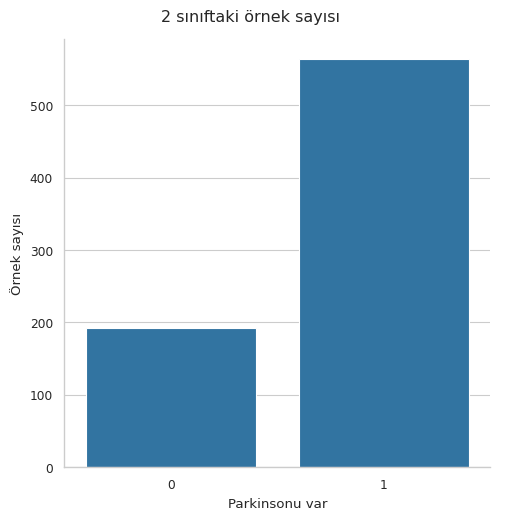

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')
#sns.set_palette('GnBu_d')
a = sns.catplot(x='class', data=data, kind='count')
a.fig.suptitle('2 sınıftaki örnek sayısı', y=1.03)
a.set(ylabel='Örnek sayısı', xlabel='Parkinsonu var')
plt.show()

# Yeniden örnekleme (Resampling)

Resampling, eldeki veri üzerinde yeni örnekler oluşturmak veya veri dağılımını değiştirmek için uygulanan bir istatistiksel tekniktir. Amaç, modeli daha güvenilir hâle getirmek veya dengesiz veri gibi sorunları çözmektir.

Bu verisetine Oversampling uygulanmıştır, az olan sınıftan yeni örnekler üretmek veya mevcut örnekleri çoğaltmak.

In [6]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=27
)

X = pd.concat([X_train, y_train], axis=1)

parkinson = X.loc[X['class'] == 1]
not_parkinson = X.loc[X['class'] == 0]


fraud_upsampled = resample(not_parkinson,
                          replace=True,
                          n_samples=len(parkinson),
                          random_state=27)


upsampled = pd.concat([parkinson, fraud_upsampled])
y_train_up = upsampled.loc[:,'class']
X_train_up = upsampled.drop(['class'], axis=1)

#min_max_scaler = preprocessing.MinMaxScaler()
#X_train_up = min_max_scaler.fit_transform(X_train_up)
#X_test = min_max_scaler.transform(X_test)
upsampled['class'].value_counts()

,count
class,
1,453
0,453


In [7]:
X_train = X_train_up
y_train = y_train_up

Özellikleri 0 ile 1 arasında olacak şekilde standardization gerçekleştirilir

In [8]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X_val = min_max_scaler.transform(X_val)

In [9]:
X_train

array([[1.        , 0.91348072, 0.31658795, ..., 0.3418616 , 0.32070282,
        0.04434255],
       [0.        , 0.76418506, 0.64100408, ..., 0.88171484, 0.86721761,
        0.58907748],
       [1.        , 0.88080497, 0.37248496, ..., 0.73726713, 0.70468181,
        0.20621876],
       ...,
       [0.        , 0.86873022, 0.0058873 , ..., 0.35006186, 0.3127969 ,
        0.14105636],
       [1.        , 0.84789511, 0.26337582, ..., 0.08875258, 0.03595286,
        0.0945932 ],
       [0.        , 0.88485863, 0.02817494, ..., 0.01325361, 0.02825575,
        0.00819033]])

In [10]:
!pip install tensorflow

# CNN mimarisi

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = (604, 1)

model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=2, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=2, activation='relu'),
    layers.GlobalAveragePooling1D(),

    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')   # binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")]
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 602, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 301, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 299, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 149, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 148, 64)        │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 74, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 73, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,425 (154.00 KB)

 Trainable params: 39,425 (154.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    shuffle=True
)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - AUC: 0.4491 - accuracy: 0.4733 - loss: 0.6945 - val_AUC: 0.5000 - val_accuracy: 0.2368 - val_loss: 0.6985
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - AUC: 0.5047 - accuracy: 0.5185 - loss: 0.6925 - val_AUC: 0.5000 - val_accuracy: 0.2368 - val_loss: 0.6979
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - AUC: 0.5347 - accuracy: 0.5014 - loss: 0.6926 - val_AUC: 0.6925 - val_accuracy: 0.2368 - val_loss: 0.6951
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - AUC: 0.5653 - accuracy: 0.5279 - loss: 0.6924 - val_AUC: 0.6628 - val_accuracy: 0.2368 - val_loss: 0.7063
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - AUC: 0.5369 - accuracy: 0.4885 - loss: 0.6930 - val_AUC: 0.7261 - val_accuracy: 0.2368 - val_loss: 0.7065
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - AUC: 0.6140 - accuracy: 0.5308 - loss: 0.6890 - val_AUC: 0.7179 - val_accuracy: 0.3816 - val_loss: 0.7019
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1

Eğitim ve doğrulama hatası

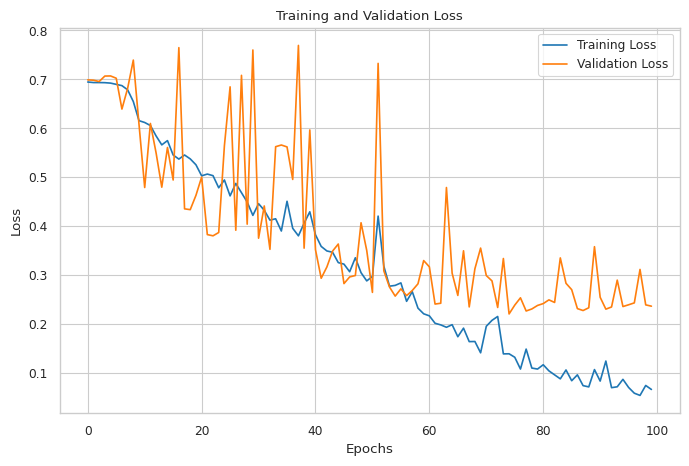

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

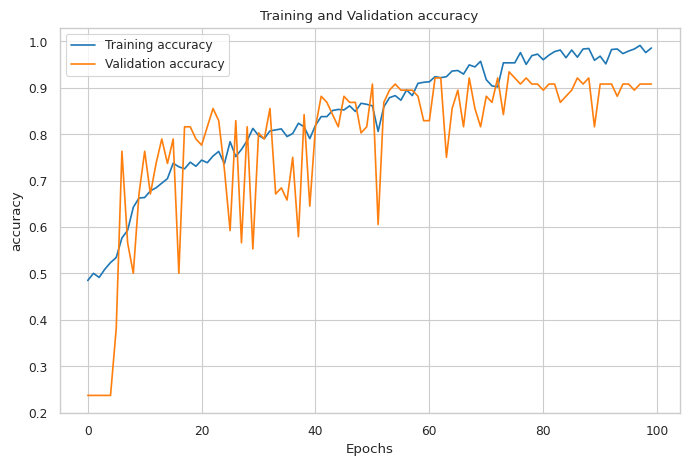

In [34]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

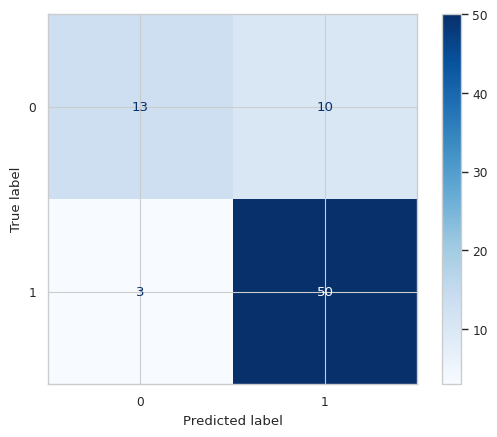

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        23
           1       0.83      0.94      0.88        53

    accuracy                           0.83        76
   macro avg       0.82      0.75      0.78        76
weighted avg       0.83      0.83      0.82        76



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


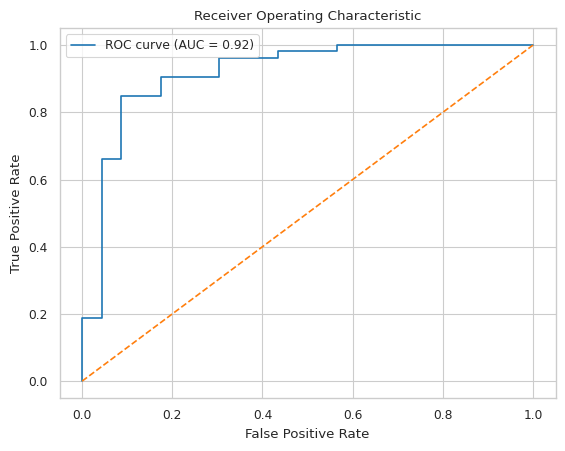

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability scores from model
y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()